In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy.fft import fft, ifft
import scipy.signal
sns.set()

In [81]:
DF_asset=pd.read_csv("assets.csv")
DF_asset['sensors'] = DF_asset['sensors'].str[2:9]
DF_asset_clean = DF_asset[['sensors', 'modelType',
       'name', 'specifications.axisX', 'specifications.axisY',
       'specifications.axisZ', 'specifications.maxDowntime',
       'specifications.maxTemp', 'specifications.power', 'specifications.rpm',
       'specifications.workdays']].copy()
DF_asset_clean.columns = DF_asset_clean.columns.str.replace('specifications.', '')

DF_collects=pd.read_csv("collects.csv")
DF_collects_clean = DF_collects[['sensorId','params.accelRMS.x', 'params.accelRMS.y',
       'params.accelRMS.z', 'params.duration', 'params.sampRate',
       'params.timeStart', 'params.velRMS.x', 'params.velRMS.y',
       'params.velRMS.z', 'temp']].copy()
DF_collects_clean.columns = DF_collects_clean.columns.str.replace('params.', '')
array_main = []
for i in DF_collects_clean["sensorId"].unique():
    size = DF_collects_clean[DF_collects_clean["sensorId"]==i].shape[0]
    sample = DF_collects_clean.loc[DF_collects_clean["sensorId"]==i,"duration"].iloc[0]
    array_aux = np.linspace(0,int(size*sample),size)
    array_main = np.append(array_main,array_aux)
DF_collects_clean["time"] = array_main

DF_merge = DF_collects_clean.merge(DF_asset_clean, left_on='sensorId', right_on='sensors')


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_22512\4263447283.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  DF_asset_clean.columns = DF_asset_clean.columns.str.replace('specifications.', '')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_22512\4263447283.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  DF_collects_clean.columns = DF_collects_clean.columns.str.replace('params.', '')


In [82]:
DF_merge

,sensorId,accelRMS.x,accelRMS.y,accelRMS.z,duration,sampRate,timeStart,velRMS.x,velRMS.y,velRMS.z,...,modelType,name,axisX,axisY,axisZ,maxDowntime,maxTemp,power,rpm,workdays
0,IAJ9206,0.010463,0.004463,0.011677,3.006,1656.686627,1.622506e+09,0.000511,0.000176,0.000289,...,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
1,IAJ9206,0.011437,0.004983,0.011482,3.006,1656.686627,1.622507e+09,0.000633,0.000238,0.000292,...,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
2,IAJ9206,0.010494,0.005024,0.011120,3.006,1656.686627,1.622507e+09,0.000524,0.000226,0.000246,...,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
3,IAJ9206,0.009859,0.004786,0.011096,3.006,1656.686627,1.622508e+09,0.000437,0.000220,0.000248,...,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
4,IAJ9206,0.010014,0.005213,0.011332,3.006,1656.686627,1.622509e+09,0.000501,0.000251,0.000275,...,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,vertical,horizontal,axial,48.0,NaN,3.7,1735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,NEW4797,0.048851,0.080684,0.063319,2.710,1527.306273,1.625616e+09,0.000762,0.001369,0.001054,...,other,ROTULADORA SIDEL,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN
33897,NEW4797,0.049630,0.084657,0.065195,2.710,1527.306273,1.625617e+09,0.000791,0.001380,0.001174,...,other,ROTULADORA SIDEL,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN
33898,NEW4797,0.048705,0.069750,0.132227,2.712,1526.179941,1.625618e+09,0.000725,0.001206,0.001403,...,other,ROTULADORA SIDEL,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN
33899,NEW4797,0.049600,0.068588,0.131735,2.711,1526.742899,1.625619e+09,0.000740,0.001337,0.001374,...,other,ROTULADORA SIDEL,NaN,NaN,NaN,1.0,70.0,NaN,1458.0,NaN


In [4]:
DF_asset_clean

,sensors,modelType,name,axisX,axisY,axisZ,maxDowntime,maxTemp,power,rpm,workdays
0,IAJ9206,compressor,Ventilador Acima do Elemento GA160 FF - Prédio...,vertical,horizontal,axial,48.00,NaN,3.7,1735.0,NaN
1,LZY4270,heaterFurnace,RDF-61.1,axial,vertical,horizontal,0.25,55.0,0.0,1740.0,NaN
2,MUR8453,transformer,TRANSFORMADOR 500 KVA N°1,horizontal,vertical,NaN,NaN,65.0,NaN,NaN,NaN
3,MXK6435,pump,Motor Bomba - Tanque de Expansão Tubo Verde,horizontal,axial,vertical,48.00,NaN,7.0,3525.0,NaN
4,MYD8706,pump,CAG1- BAGS.12- Motor,horizontal,axial,vertical,NaN,NaN,30.0,1765.0,NaN
5,MYS2071,heaterFurnace,VTF-61.1,axial,radial,horizontal,0.25,60.0,1.5,894.0,[]
6,MZU6388,eletricMotor,Boko MA-1510 - Motor 2 da UH,horizontal,vertical,radial,NaN,65.0,37.0,1750.0,"[0,1,2,3,4,5]"
7,NAH4736,compressor,Ventilador -GA75 FF - Prédio B104,NaN,NaN,NaN,48.00,NaN,2.0,1080.0,NaN
8,NAI1549,pump,CAG1- BAGS.3- Motor,axial,horizontal,vertical,NaN,NaN,75.0,1775.0,NaN
9,NEW4797,other,ROTULADORA SIDEL,NaN,NaN,NaN,1.00,70.0,NaN,1458.0,NaN


## plots from asset.csv

[Text(0, 0, 'compressor'),
 Text(1, 0, 'heaterFurnace'),
 Text(2, 0, 'transformer'),
 Text(3, 0, 'pump'),
 Text(4, 0, 'eletricMotor'),
 Text(5, 0, 'other')]

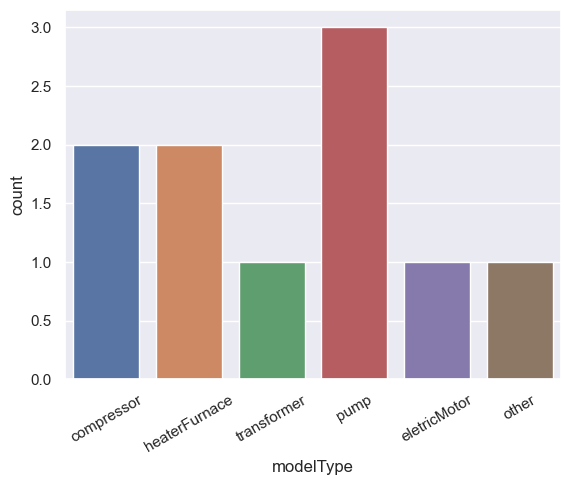

In [5]:
# plot from asset
ax=sns.countplot(data=DF_asset_clean,x="modelType")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'vertical'), Text(1, 0, 'axial'), Text(2, 0, 'horizontal')]

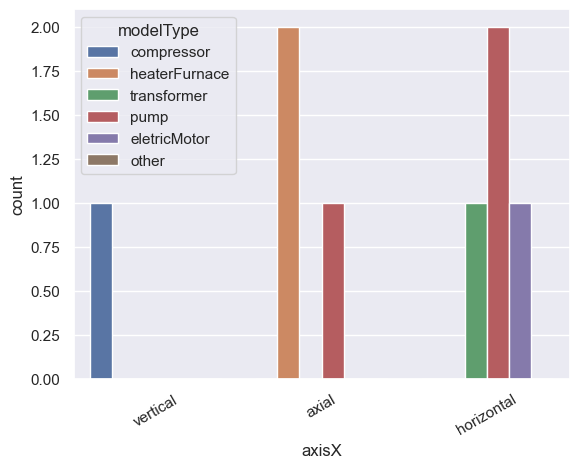

In [6]:
# plot from asset
ax=sns.countplot(data=DF_asset_clean,x="axisX",hue="modelType")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'horizontal'),
 Text(1, 0, 'vertical'),
 Text(2, 0, 'axial'),
 Text(3, 0, 'radial')]

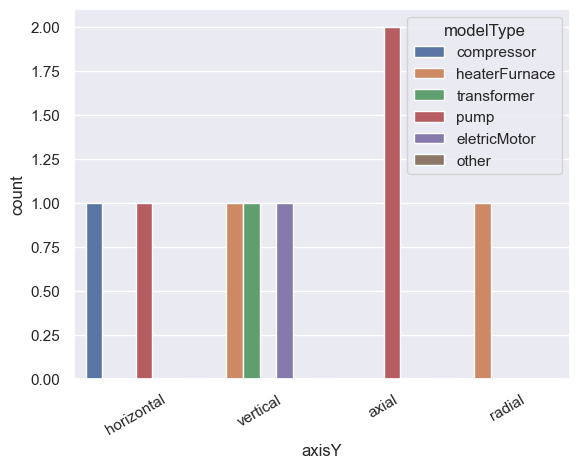

In [7]:
# plot from asset
ax=sns.countplot(data=DF_asset_clean,x="axisY",hue="modelType")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'axial'),
 Text(1, 0, 'horizontal'),
 Text(2, 0, 'vertical'),
 Text(3, 0, 'radial')]

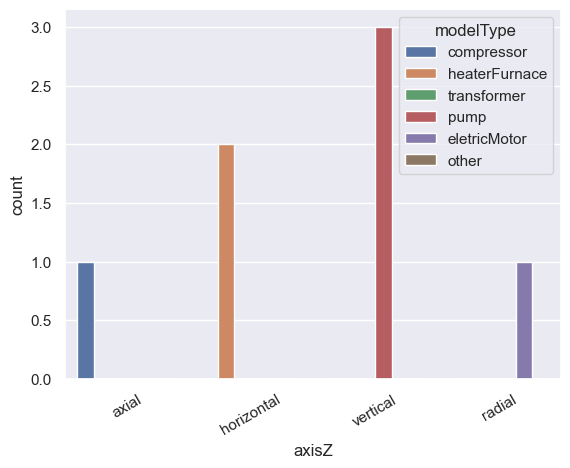

In [8]:
# plot from asset
ax=sns.countplot(data=DF_asset_clean,x="axisZ",hue="modelType")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_22512\2573126222.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


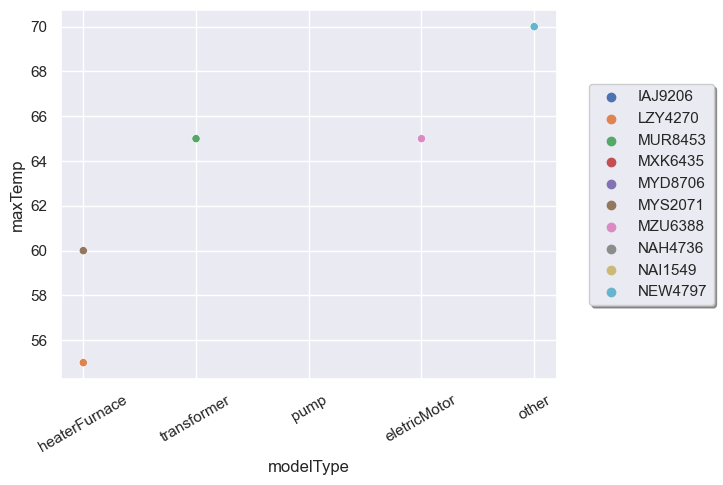

In [9]:
ax=sns.scatterplot(data=DF_asset_clean,x="modelType",y="maxTemp",hue="sensors")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True, shadow=True)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_22512\873144598.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


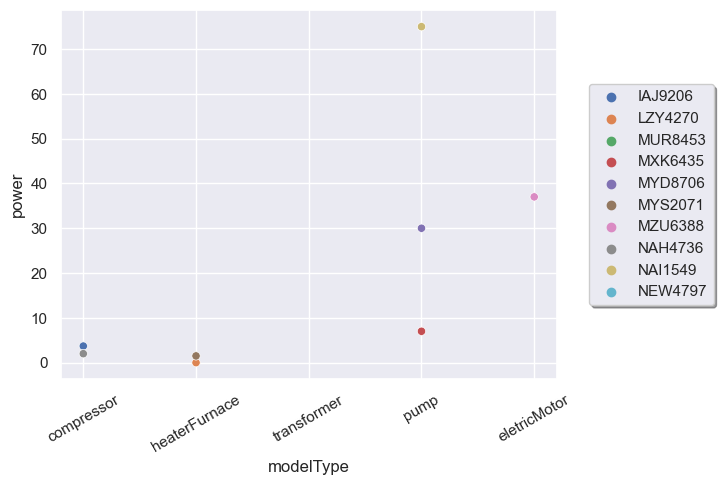

In [10]:
ax=sns.scatterplot(data=DF_asset_clean,x="modelType",y="power",hue="sensors")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True, shadow=True)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_22512\1590403037.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


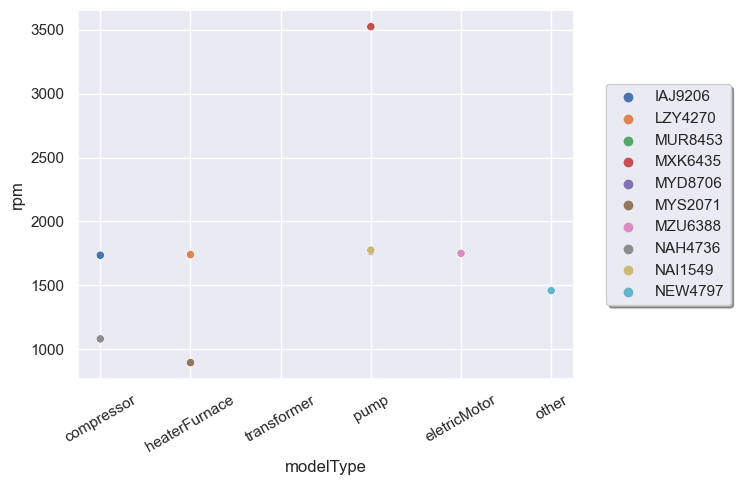

In [11]:

ax=sns.scatterplot(data=DF_asset_clean,x="modelType",y="rpm",hue="sensors")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True, shadow=True)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_22512\3290737870.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


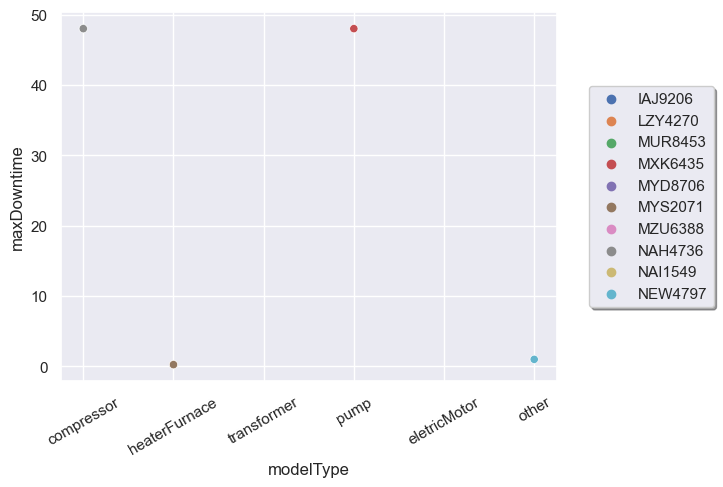

In [12]:
ax=sns.scatterplot(data=DF_asset_clean,x="modelType",y="maxDowntime",hue="sensors")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          ncol=1, fancybox=True, shadow=True)

In [148]:
DF_collects_clean["sensorId"].unique()

array(['IAJ9206', 'LZY4270', 'MUR8453', 'MXK6435', 'MYD8706', 'MYS2071',
       'MZU6388', 'NAH4736', 'NAI1549', 'NEW4797'], dtype=object)

Text(0.5, 1.0, 'MZU6388 Temperature')

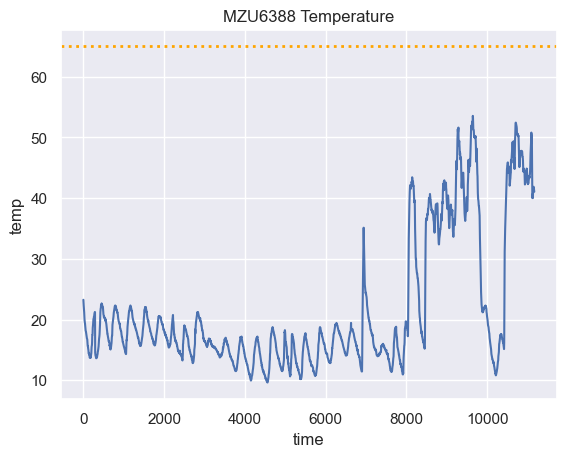

In [229]:
sensor = "MZU6388"
ax = sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]==sensor],x="time",y="temp")
ax.axhline(y=int(DF_asset_clean.loc[DF_asset_clean["sensors"]==sensor,"maxTemp"]), linewidth=2, color='orange', ls=':')
ax.set_title(sensor + " Temperature")

Text(0.5, 1.0, 'MZU6388 Velocity in x')

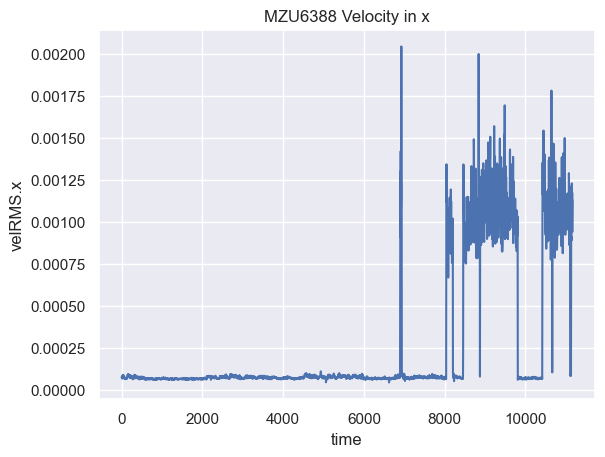

In [230]:
ax =sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]==sensor],x="time",y="velRMS.x")
ax.set_title(sensor + " Velocity in x")
#ax.axhline(y=0.0003, linewidth=2, color='orange', ls=':')

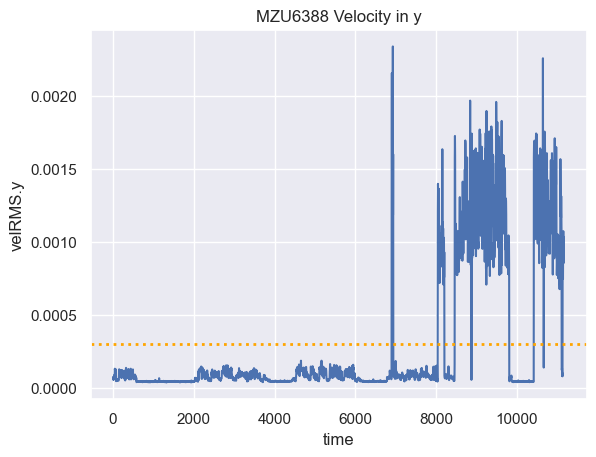

In [231]:
ax=sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]==sensor],x="time",y="velRMS.y")
ax.set_title(sensor + " Velocity in y")
ax.axhline(y=0.0003, linewidth=2, color='orange', ls=':')

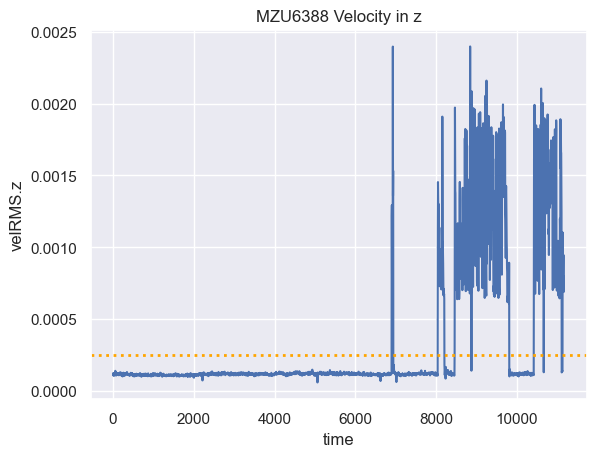

In [232]:
ax=sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]==sensor],x="time",y="velRMS.z")
ax.set_title(sensor + " Velocity in z")
ax.axhline(y=0.00025, linewidth=2, color='orange', ls=':')

Text(0.5, 1.0, 'MZU6388 Acceleration in x')

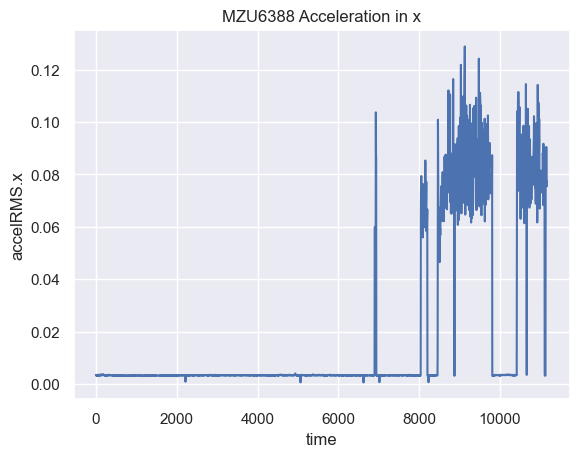

In [233]:
ax=sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]==sensor],x="time",y="accelRMS.x")
ax.set_title(sensor + " Acceleration in x")

Text(0.5, 1.0, 'MZU6388 Acceleration in y')

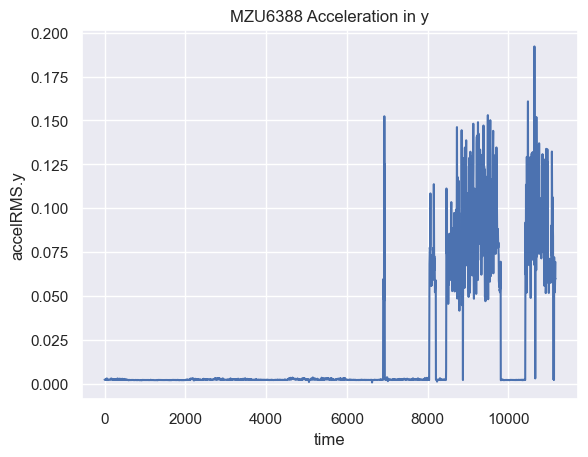

In [234]:
ax=sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]==sensor],x="time",y="accelRMS.y")
ax.set_title(sensor + " Acceleration in y")

Text(0.5, 1.0, 'MZU6388 Acceleration in x')

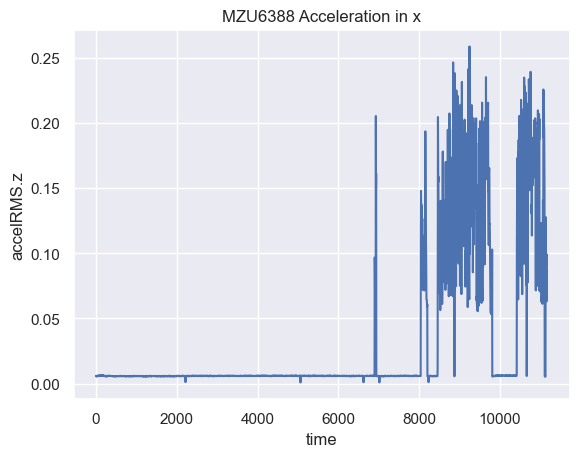

In [235]:
ax=sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]==sensor],x="time",y="accelRMS.z")
ax.set_title(sensor + " Acceleration in x")

##  QUESTION 2

In [ ]:
## 2 Downtime and uptime
# idea -> using the vibration data from all three axis whenever the accelaration is ~0  in all three axis 
# we consider that the machine is down. Summing the "duration" of each period of time when the machine is down, we will 
# be able to acquire the total downtime, and by consequence the uptime too.

# For this question I will use the asset "IAJ9206"



In [133]:
DF_Q2 = DF_collects_clean.loc[DF_collects_clean["sensorId"]=="IAJ9206"].copy()

In [134]:
# the function here solely compare all three velocity value for each coordanate, if all three are below a threshold,
# we consider that the machine is down 
# i created the function with this structure instead of directly analysing the dataframe at once because this makes more sense
# due to the fact that we do not have all the information at once, we need to analyse step-by-step

def downtime_q(x,y,z,trh=0.0003,duration=3.006):
    if (x < trh) & (y < trh) & (z < trh):
        time = duration
    else:
        time = 0
    return time



In [147]:
# mockup data acquisition in time
downtime=0
total_time =0
for i in range(DF_Q2.shape[0]):
    x=DF_Q2["velRMS.x"].iloc[i]
    y=DF_Q2["velRMS.y"].iloc[i]
    z=DF_Q2["velRMS.z"].iloc[i]
    time=downtime_q(x,y,z,trh=0.0002,duration=3.006)
    downtime = downtime + time
    total_time = total_time + 3.006

print("Downtime " + str(downtime) + " seconds")
print("Uptime " + str(total_time-downtime) + " seconds")
if downtime/60 < 48:
    print("Downtime below maximum downtime allowed!")
else: 
    print("Downtime above maximum downtime allowed!!!!!!!!!!")

Downtime 1764.5220000000138 seconds
Uptime 10217.393999999586 seconds
Downtime below maximum downtime allowed


## QUESTION 3

In [ ]:
# For this task a possible way to analyzing the vibration signals is to "cut the signal" into observation windows
# and apply fft and compare the harmonic components for each observation window, and whenever there is a "relevant"
# difference we will consider that there is a change in the system behavior.
# this type of analysis can help us understand the different type loads that the system is subject





In [294]:
DF_Q3 = DF_collects_clean.loc[DF_collects_clean["sensorId"]=="MZU6388"].copy()
#removing a single NaN measurement.
DF_Q3.dropna(inplace=True)
DF_Q3["obs_win"]=pd.qcut(DF_Q3["time"], 20,labels=False)
a,ret=pd.qcut(DF_Q3["time"],20, labels=False,retbins=True)

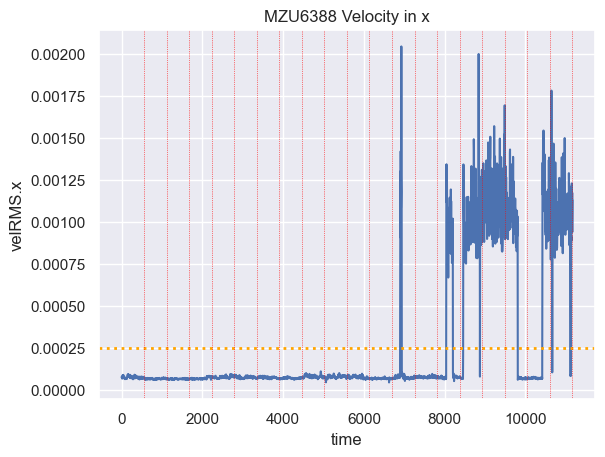

In [359]:
ax=sns.lineplot(data=DF_collects_clean[DF_collects_clean["sensorId"]=="MZU6388"],x="time",y="velRMS.x")
ax.set_title(sensor + " Velocity in x")
ax.axhline(y=0.00025, linewidth=2, color='orange', ls=':')
for  i in range(1,len(ret),1):   
    ax.axvline(x=ret[i], linewidth=0.5, color='red', ls=':')

In [368]:
ret

array([    0.        ,   557.99978479,  1115.99956958,  1673.99935438,
        2231.99913917,  2789.99892396,  3347.99870875,  3905.99849354,
        4463.99827834,  5021.99806313,  5579.99784792,  6137.99763271,
        6695.9974175 ,  7253.9972023 ,  7811.99698709,  8374.00107604,
        8932.00086083,  9490.00064562, 10048.00043042, 10606.00021521,
       11164.        ])

7253.997202295552

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


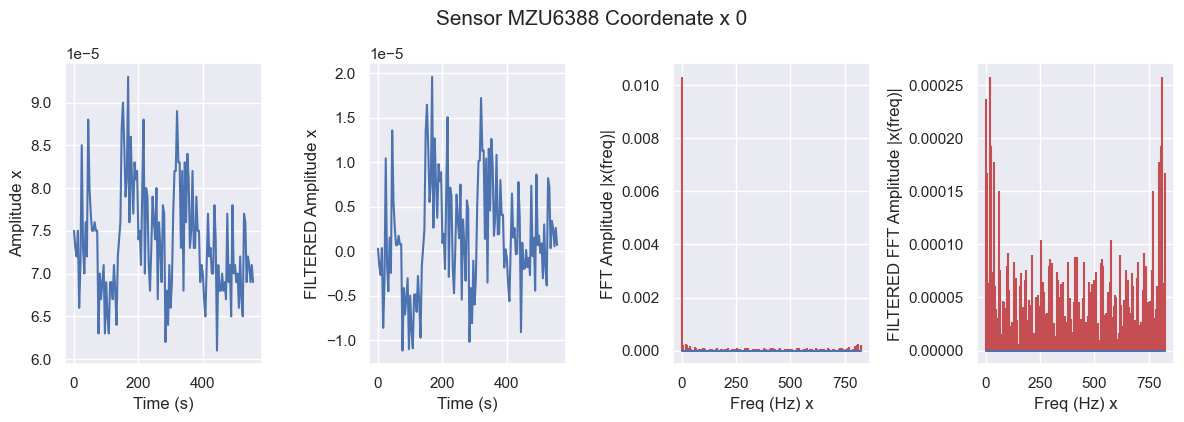

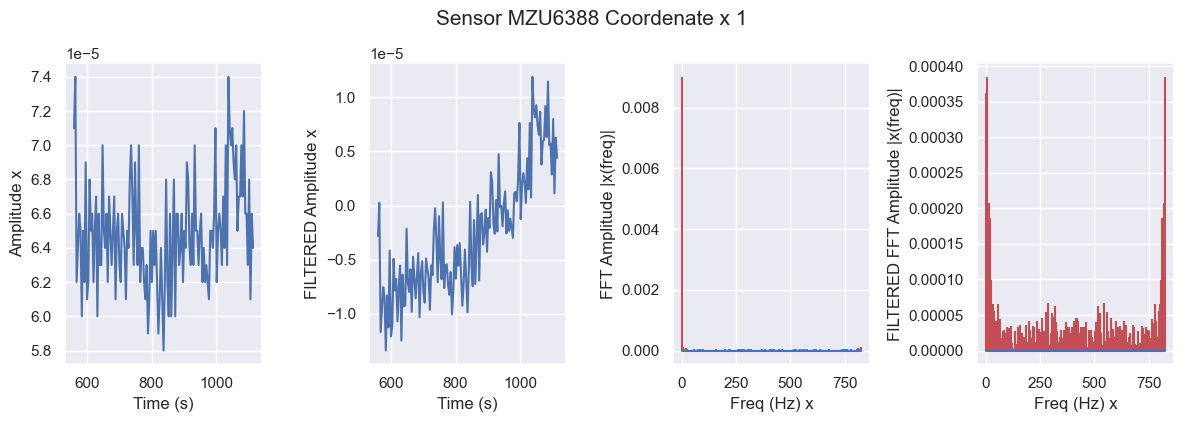

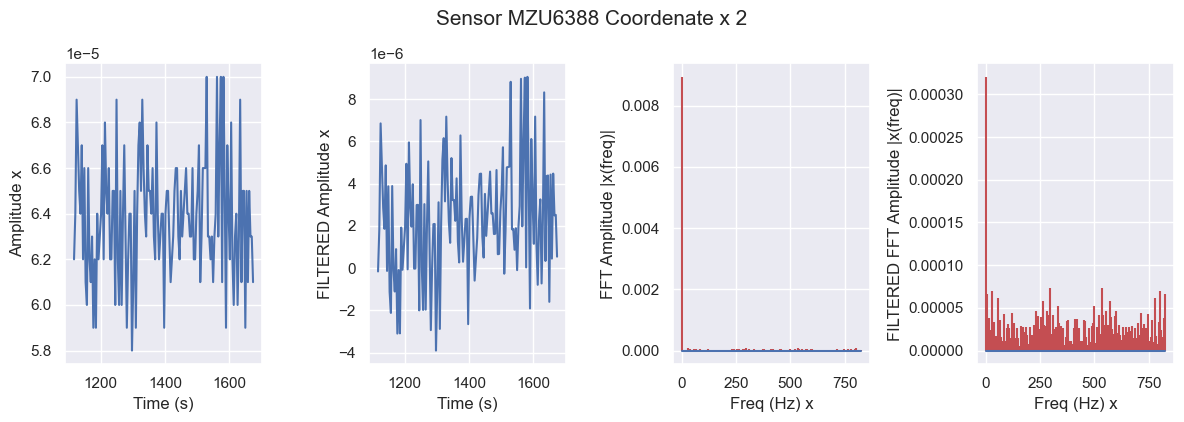

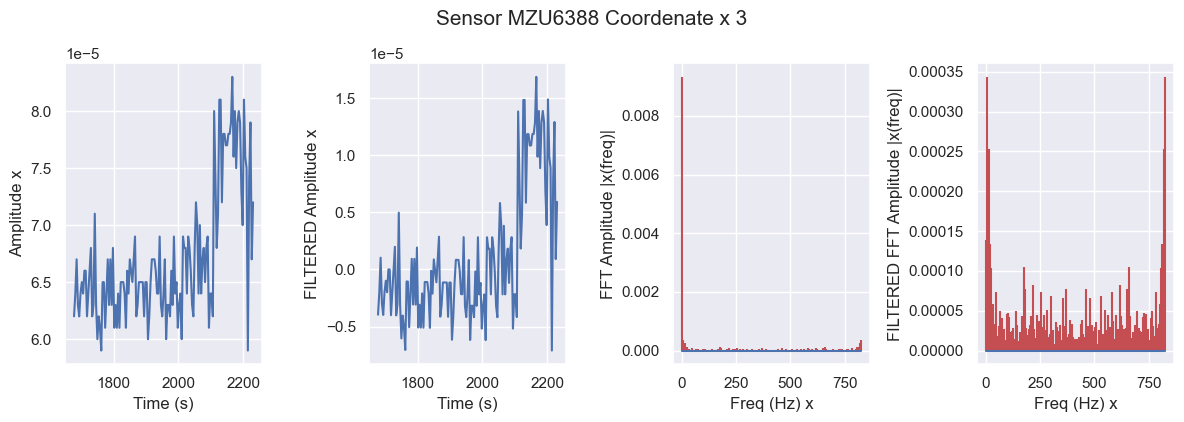

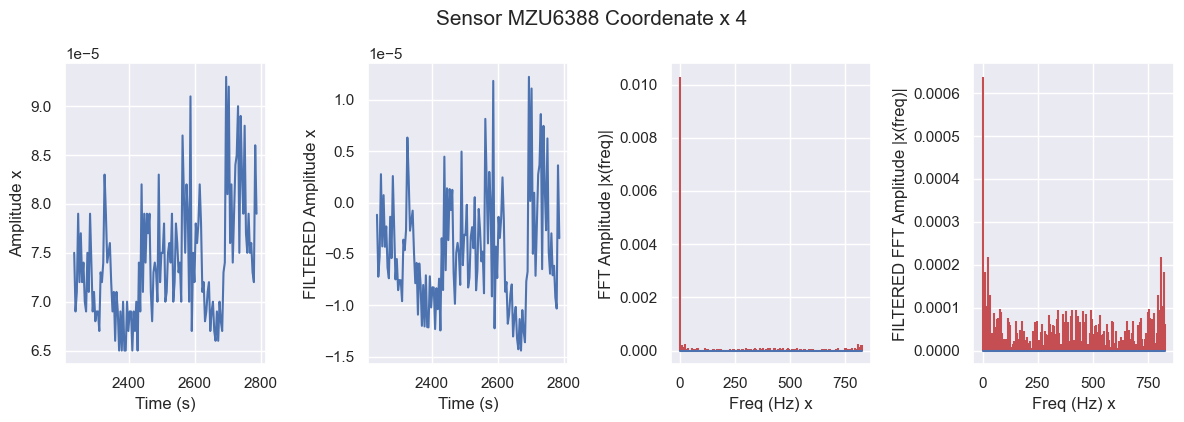

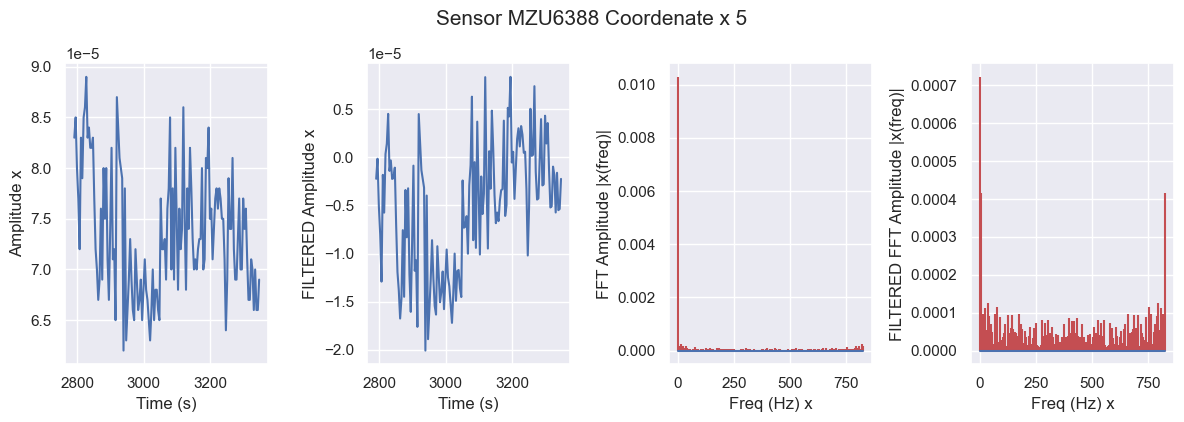

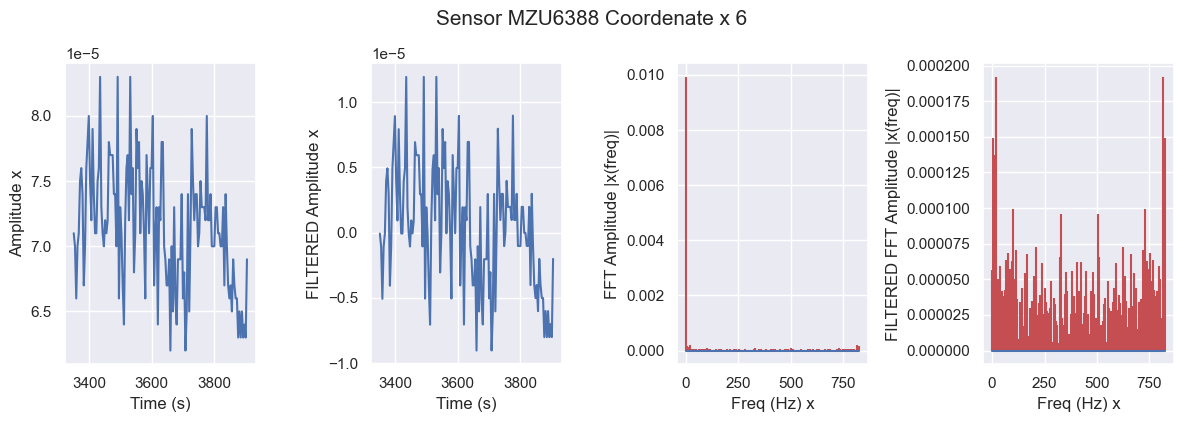

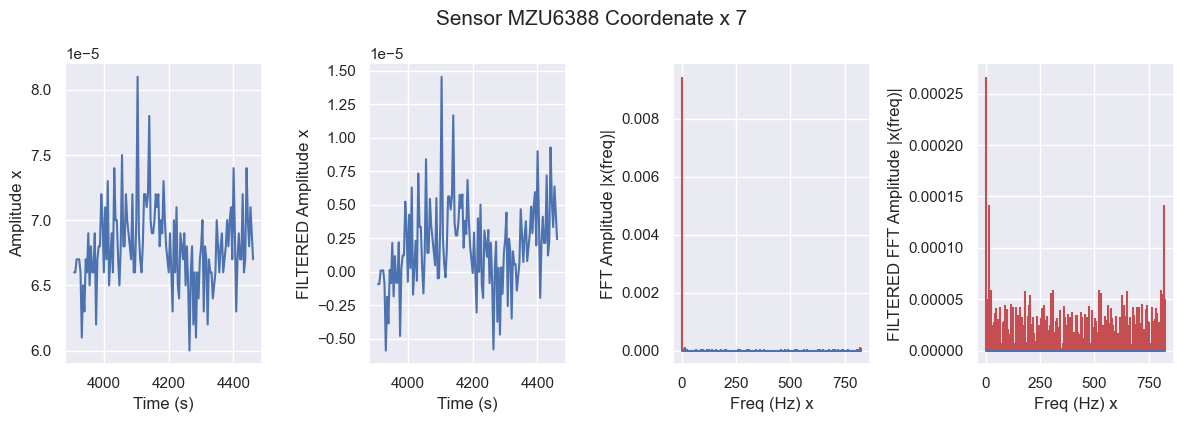

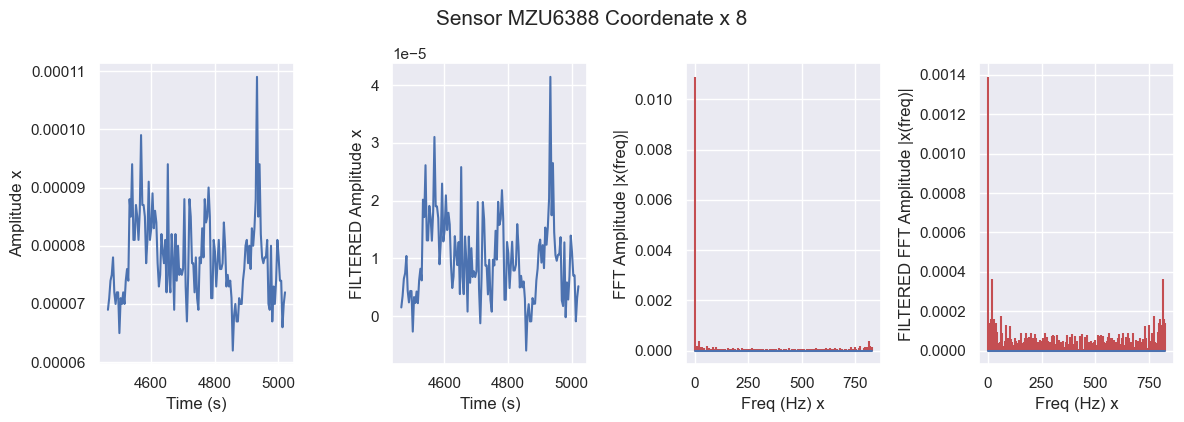

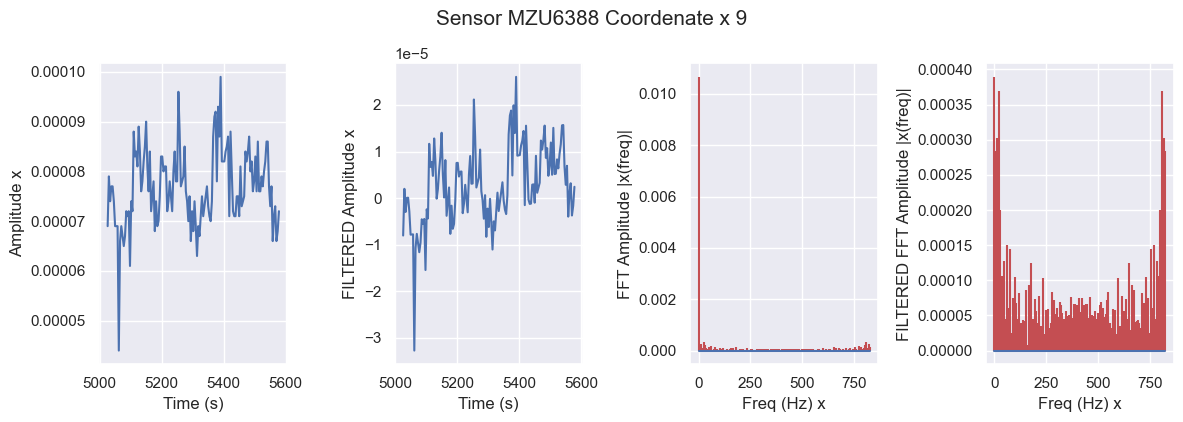

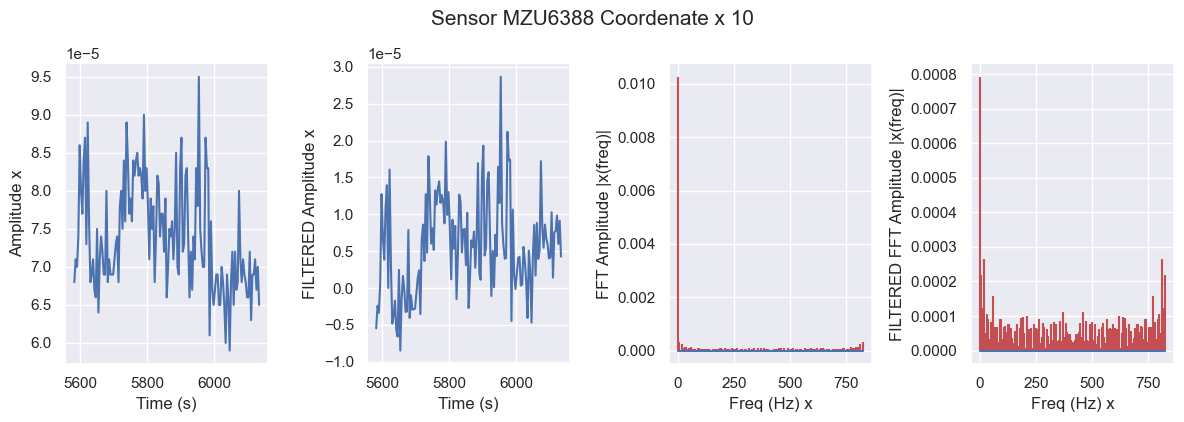

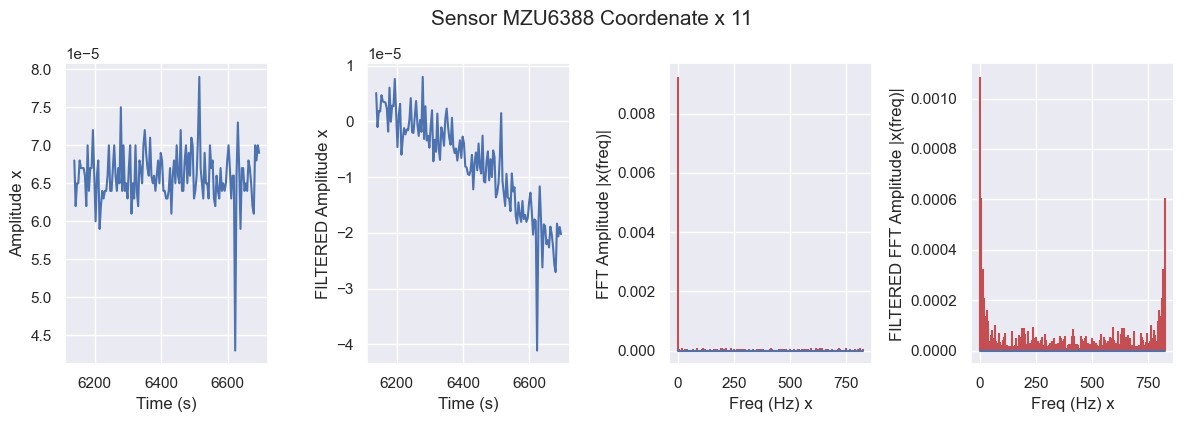

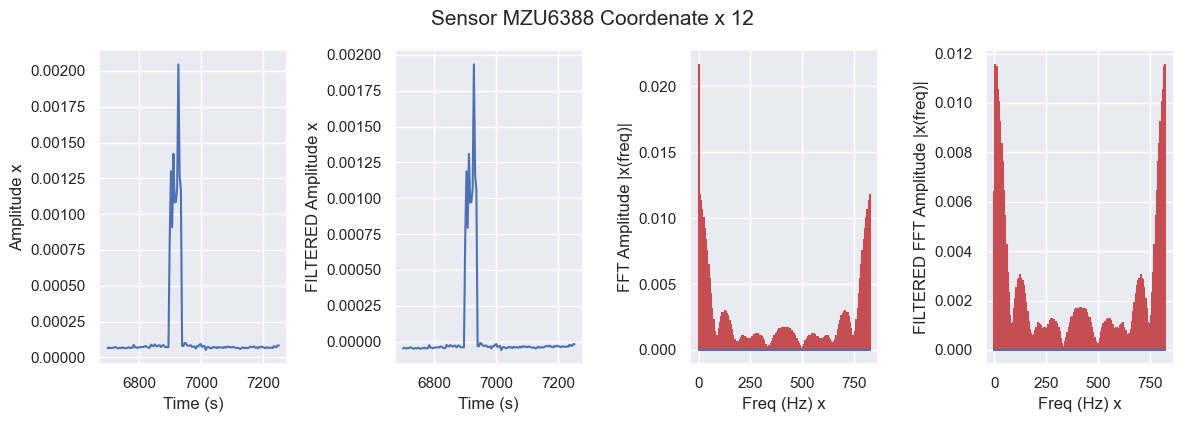

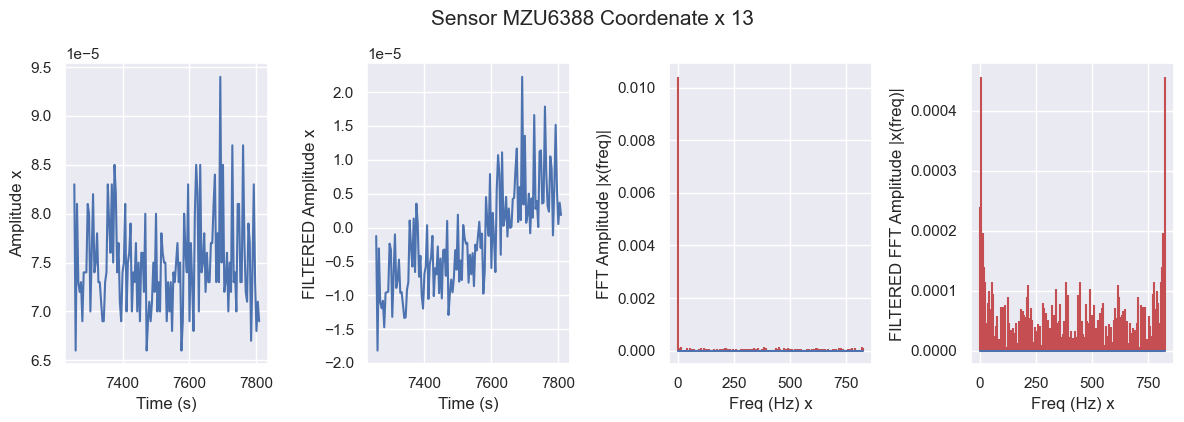

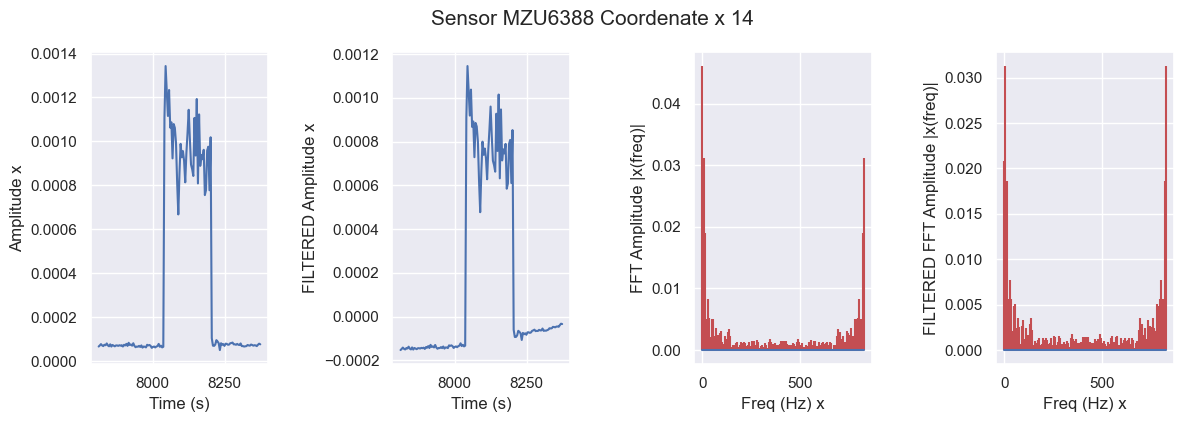

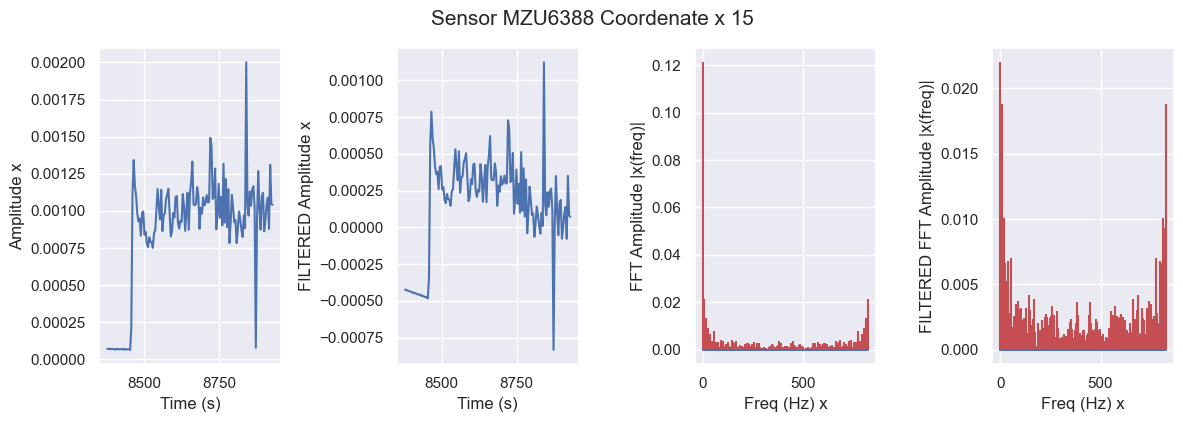

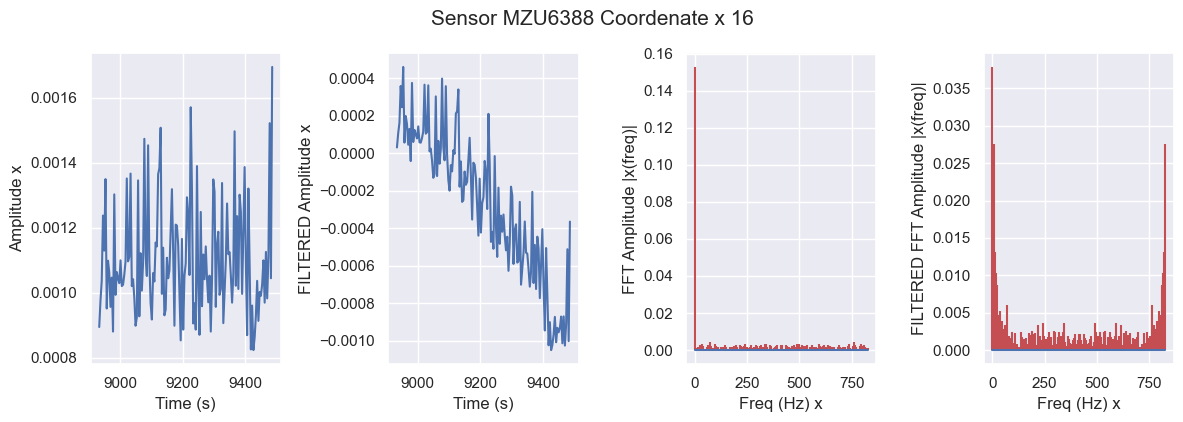

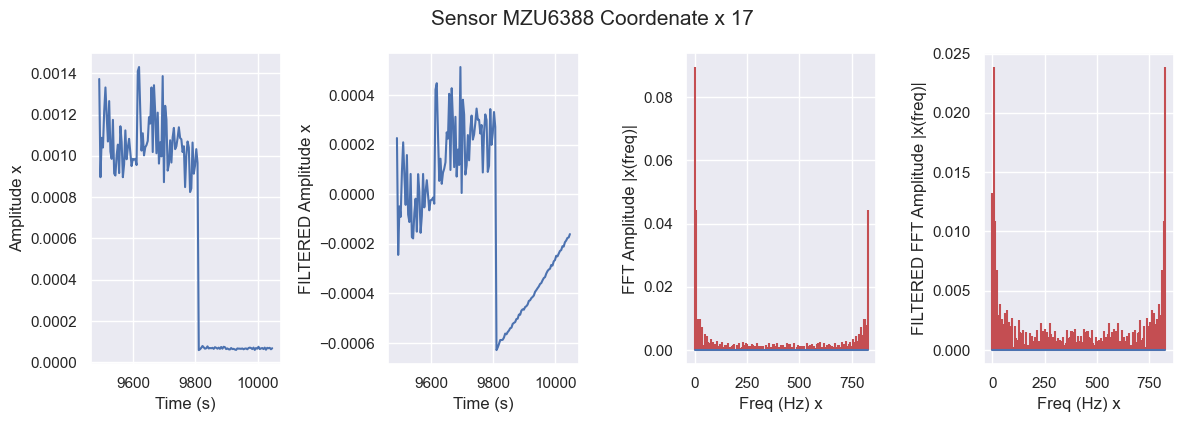

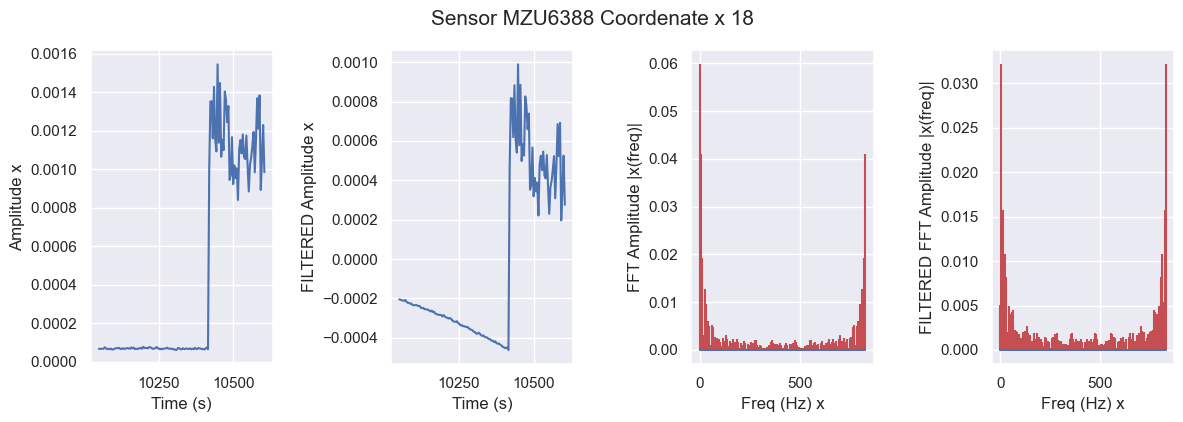

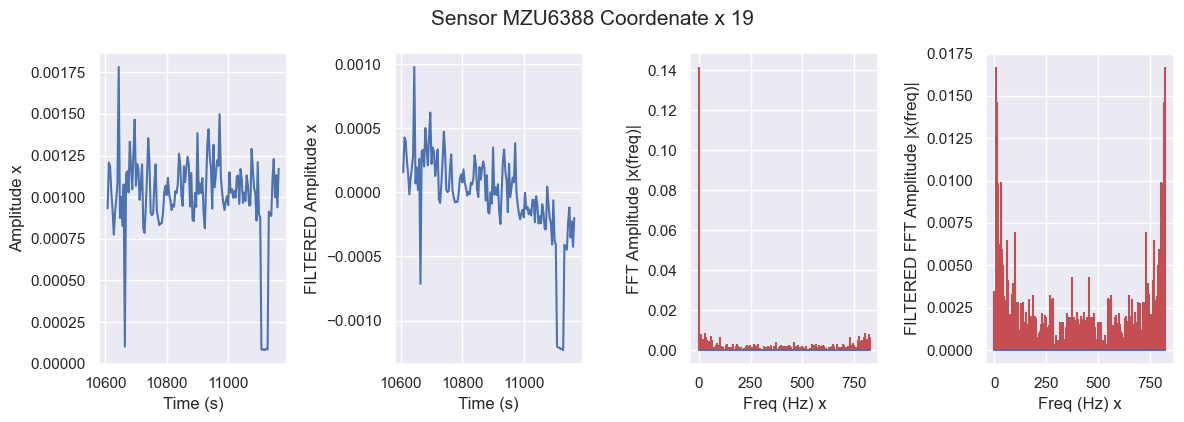

In [295]:
obs_win = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for i in obs_win:
    x = DF_Q3.loc[DF_Q3["obs_win"]==obs_win[i],"velRMS.x"]
    X = fft(x)
    N = len(X)
    t = DF_Q3.loc[DF_Q3["obs_win"]==obs_win[i],"time"]
    sr = DF_Q3.loc[DF_Q3["obs_win"]==obs_win[i],"sampRate"].iloc[0]
    n = np.arange(N)
    T = N/sr
    freq = n/T 

    cutoff =0.5
    # FILTERED HIGH-PASS
    sos = scipy.signal.butter(5, cutoff, 'highpass', fs=sr, output='sos')
    x_filtered = scipy.signal.sosfiltfilt(sos, x)
    X_filtered = fft(x_filtered)



    plt.figure(figsize = (12, 4))

    plt.subplot(141)
    plt.plot(t, ifft(X), "b")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude '+ "x")

    plt.subplot(142)
    plt.plot(t, ifft(X_filtered), "b")
    plt.xlabel('Time (s)')
    plt.ylabel('FILTERED Amplitude '+ "x")

    plt.subplot(143)
    plt.stem(freq, np.abs(X), "r", \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz) ' + "x")
    plt.ylabel('FFT Amplitude |' + "x"+'(freq)|')
    #plt.xlim(-5, 100)

    plt.subplot(144)
    plt.stem(freq, np.abs(X_filtered), "r", \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz) ' + "x")
    plt.ylabel('FILTERED FFT Amplitude |' + "x"+'(freq)|')
    #plt.xlim(-5, 100)

    plt.tight_layout()
    plt.suptitle("Sensor "+DF_Q3.loc[DF_Q3["obs_win"]==0,"sensorId"].iloc[0]+" Coordenate "+ "x " + str(obs_win[i]), fontsize=15,x=0.5,y=1.05)
    plt.show()

In [375]:
# Now comparing the Filtered
compa_valu=[]
for i in obs_win:
    x = DF_Q3.loc[DF_Q3["obs_win"]==obs_win[i],"velRMS.x"]
    sos = scipy.signal.butter(5, cutoff, 'highpass', fs=sr, output='sos')
    x_filtered = scipy.signal.sosfiltfilt(sos, x)
    X_filtered = fft(x_filtered)
    X_filtered_abs = np.abs(X_filtered)
    X_filtered_abs_mean = np.mean(X_filtered_abs)
    X_filtered_abs_std = np.std(X_filtered_abs)
    aux = X_filtered_abs_mean + X_filtered_abs_std
    #print(aux.round(7))
    compa_valu = np.append(compa_valu, aux)
    if i == 0:
        compa_fin=0
    else:
        compa_fin = np.abs(compa_valu[i]-compa_valu[i-1])/compa_valu[i-1]
        print(compa_fin.round(5))
        if compa_fin >= 3:
            print("!!!!!!!the system load changed!!!!!!!!!" +"observation window "+str(i) + " time " + str(ret[i].round(2)) + "ms") 

0.04136
0.42831
0.6448
0.24751
0.14985
0.45028
0.19238
2.25336
0.27913
0.00593
0.28814
26.93847
!!!!!!!the system load changed!!!!!!!!!observation window 12 time 6696.0ms
0.97622
55.65042
!!!!!!!the system load changed!!!!!!!!!observation window 14 time 7812.0ms
0.14955
0.2761
0.31445
0.28352
0.13811
